In [1]:
#data
import pandas as pd
import numpy as np
import math
from datetime import datetime
#ustawienie dat na polskie
import locale
locale.setlocale(locale.LC_TIME, 'pl_PL.utf8')
#dopasowanie rozkładu
import scipy
from sklearn.preprocessing import StandardScaler
import scipy.stats
#wizualizacja
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# ALIOR BANK S.A.

In [2]:
alior = pd.read_csv("alior.csv", delimiter=";") #wczytanie danych

In [3]:
alior.head() #pierwsze wiersze

,Data,Otwarcie,Zamkniecie
0,30.11.2015,65.89,59.63
1,31.12.2015,59.98,54.23
2,31.01.2016,54.14,49.09
3,29.02.2016,49.21,48.82
4,31.03.2016,48.84,52.97


In [4]:
alior.info() #rodzaje kolumn, ilosc kolumn, informacje

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Data        60 non-null     object 
 1   Otwarcie    60 non-null     float64
 2   Zamkniecie  60 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [5]:
alior.describe() #podstawowe statystyki opisowe 

,Otwarcie,Zamkniecie
count,60.000000,60.0000
mean,52.237167,51.2125
std,19.347939,19.9710
min,12.780000,12.8600
25%,46.102500,43.5875
50%,54.960000,54.2100
75%,66.117500,66.2250
max,85.750000,85.5000


In [6]:
alior['L_Alior'] = (alior['Otwarcie']-alior['Zamkniecie'])/alior['Otwarcie']*100
alior['Data'] = pd.to_datetime(alior['Data'])
alior['Data'] = alior['Data'].apply(lambda x: datetime.strftime(x,'%b-%Y'))

alior.head()

,Data,Otwarcie,Zamkniecie,L_Alior
0,lis-2015,65.89,59.63,9.500683
1,gru-2015,59.98,54.23,9.586529
2,sty-2016,54.14,49.09,9.327669
3,lut-2016,49.21,48.82,0.792522
4,mar-2016,48.84,52.97,-8.456183


In [7]:
#momenty
moments_alior = alior.agg({'L_Alior': ['count','mean','median','var','std','skew','kurtosis']}) 
alior_momenty = moments_alior.rename(index={'count':'N','mean':'Średnia','median':'Mediana','var':'Wariancja',
                             'std':'Odchylenie standardowe','skew':'Skośność','kurtosis':'Kurtoza'}) #zmiana nazw wierszy
alior_momenty

,L_Alior
N,60.000000
Średnia,2.448261
Mediana,2.725046
Wariancja,107.364277
Odchylenie standardowe,10.361673
Skośność,0.883795
Kurtoza,3.323627


In [8]:
alior.columns #wyświetlenie nazw kolumn

Index(['Data', 'Otwarcie', 'Zamkniecie', 'L_Alior'], dtype='object')

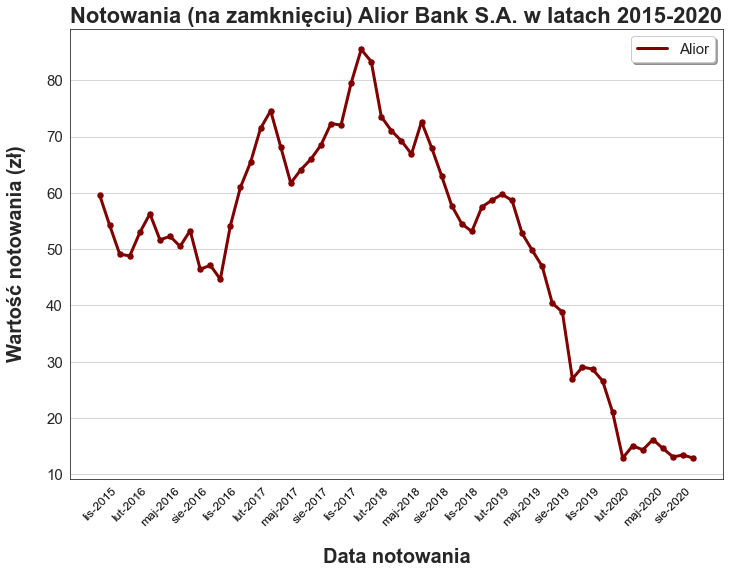

In [9]:
sns.set_style("white") #styl wykresu 

fig, ax = plt.subplots() #sposób na proste zwiększenie wykresu
fig.set_size_inches(11.7, 8.27) #rozmiary kartki A4

k = sns.lineplot(x="Data", y="Zamkniecie", data=alior, label="Alior", linewidth = 3, color="Maroon") #wykres liniowy
sns.scatterplot(x="Data", y="Zamkniecie", data=alior,s=50, color="Maroon") #zaznaczone punkty notowań

plt.legend(fancybox=True, shadow=True,framealpha=1, prop={'size':15}) #dodanie legendy

myLocator = mticker.IndexLocator( base = 3, offset = 0) #stworzenie lokalizatora, aby ustawić oś X co drugą date
ax.xaxis.set_major_locator(myLocator) #uporządkowanie osi X

k.yaxis.grid() #stworzenie horyzontalnych lin w tle wykresu

plt.xticks(rotation=45, fontsize=12, color="black") #spersonalizowanie wartości na osiach X,Y
plt.yticks(fontsize=15)

plt.title("Notowania (na zamknięciu) Alior Bank S.A. w latach 2015-2020", fontsize=22,  fontweight='bold') #tytuł wykresu
plt.ylabel("Wartość notowania (zł)", fontsize=20, labelpad=20, fontweight='bold') #tytuł osi Y
plt.xlabel("Data notowania", labelpad=20, fontsize=20, fontweight='bold') #tytuł osi X

plt.savefig('alior_notowania.jpg')

plt.show() #wyświetlenie wykresu

**Próba dopasowania rozkładu dla Alior Bank**
* Potrzebujemy przeskalować dane do testu Kolmogorov-Smirnova
* Zakłada on, że dane zostały standaryzowane (od wszystkich danych została odjęta średnia tak aby dane znajdowany się dookoła zera) oraz ze wyniki sa podzielone przez odchylenie standardowe (wiec wszystkie dane sa wyrazone jako numery odchylen standardowych ponizej lub powyzej sredniej).
* Wartość > 0.05 oznacza ze dopasowany rozklad różni sie nieznacznie od zaobserwowanego rozkladu danych


In [10]:
L_alior = alior['L_Alior']
x = np.arange(len(L_alior))
size = len(L_alior)

In [11]:
L_alior.shape

(60,)

In [12]:
L_alior.ndim

1

In [13]:
#L_alior ma 1 wymiar, aby dopasować model rozkładu potrzebujemy 2 wymiarowego
#Wykonamy standaryzacje danych uzywajac StandardScaler() z paczki 'sklearn'
#Czyli proces przeskalowania atrybutów rozkładu, aby dane miały średnią 0 i wariancje 1
sc = StandardScaler()
reshaped_alior = L_alior.values.reshape(-1,1) #zmiana wymiaru L_alior
sc.fit(reshaped_alior) #dopasowanie i standaryzacja danych do otrzymania średniej 0 i wariancji 1
alior_std = sc.transform(reshaped_alior) #przerzucenie dopasowania do zbioru
alior_std = alior_std.flatten() #powrot do 1 wymiarowego zbioru danych
alior_std
del reshaped_alior 


In [14]:
dist_names = ['burr',           #lista propozycji rozkładów
              'expon',
              'gamma',
              'genpareto',
              'norm',
              'lognorm',
              'pareto',
              'uniform',
              'weibull_min', 
              'weibull_max']
#utworzenie pustych list do przechowywania wyników testu
chi_square = []
p_values = []

#utworzenie 50 kolumn dla testu chi-kwadrat
#dane beda równomiernie rozłożone na wszystkich kolumnach
#percentyl = 1/100 kwantyl
percentile_bins = np.linspace(0,100,51) #zwraca równomiernie rozłożone próbki 
percentile_cutoffs = np.percentile(alior_std, percentile_bins) #zwraca kolejne percentyle
observed_frequency, bins = (np.histogram(alior_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

#petla dla dla kazdego kandydata
for distribution in dist_names:
    #ustawienie rozkładu i otrzymanie dopasowanych parametrów rozkładu
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(alior_std) #dopasowanie otrzymanych atrybutów do zbioru
    
    #otrzymanie 'p-value' dla testy Kolmogorov-Smirnoff, zaokraglenie do 5 miejsc
    p = scipy.stats.kstest(alior_std, distribution, args=param)[1]
    p = np.around(p,5)
    p_values.append(p)
    
    #otrzymanie spodziewanej liczby w kolumnach percentyli
    #oparte na dystrybuancie ('cumulative distribution function - cdf')
    cdf_fitted = dist.cdf(percentile_cutoffs, *param[:-2], loc=param[-2], scale=param[-1])
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)
    
    #obliczenie testu chi-kwadrat
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum(((cum_expected_frequency - cum_observed_frequency)**2) / cum_observed_frequency)
    chi_square.append(ss)
    
#Ulokowanie wyników i posortowanie po poprawności dopasowania (najlepsze z góry)
results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square
results['p_value'] = p_values
results.sort_values(['chi_square'], inplace=True)

#Wyświetlenie wyników
print ('\nRozkłady po poprawności dopasowania:')
print ('----------------------------------------')
print (results)
    
    


Rozkłady po poprawności dopasowania:
----------------------------------------
  Distribution   chi_square  p_value
0         burr     5.005029  0.79078
4         norm    10.241429  0.22633
2        gamma    10.394138  0.32741
5      lognorm    10.468121  0.34849
8  weibull_min    23.533210  0.17579
7      uniform   198.196779  0.00000
3    genpareto   407.394176  0.00057
1        expon   684.020234  0.00000
6       pareto   695.667978  0.00000
9  weibull_max  1071.739829  0.00000


Najlepsze dopasowanie otrzymaliśmy dla rozkładu Burra (Singha-Maddala, często stosowany do modelowania dochodu gospodarstwa domowego), Normalnego oraz Gamma.
Wizualizujemy te rozkłady i zwrócimy parametry. 
Tym razem będziemy przeprowadzali dopasowanie do oryginalnych danych (nie zestandaryzowanych)

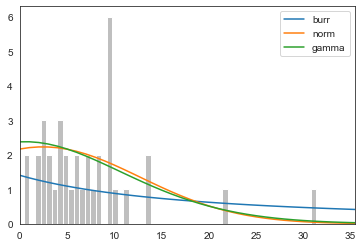


Parametry rozkładów:
------------------------

Rozkład: burr
Parametry: (0.47479515032799835, 1.4234589134064777, -22.297449785601437, 1.251387889080998)

Rozkład: norm
Parametry: (2.448260634570837, 10.274963395531392)

Rozkład: gamma
Parametry: (29.405631209042873, -52.47983177503685, 1.8679448157602854)


In [15]:
#dzielimy obserwacje na 100 kolumn dla wizualizacji
number_of_bins = 100
bin_cutoffs = np.linspace(np.percentile(L_alior, 0), np.percentile(L_alior, 99), number_of_bins)

#tworzymy wykres
h = plt.hist(L_alior, bins=bin_cutoffs, color='0.75')

#wybierzmy 3 najlepsze rozkłady
number_distributions_to_plot = 3
dist_names = results['Distribution'].iloc[0:number_distributions_to_plot]

#tworzenie pustej listy do zwrócenia parametrów dopasowanych rozkładów
parameters = []

#petla po rozkładach aby otrzymać parametry i dopasować linie
for dist_name in dist_names:
    #wybierzemy rozkład i przechowamy parametry rozkładu
    dist = getattr(scipy.stats,dist_name)
    param = dist.fit(L_alior)
    parameters.append(param)
    
    #narysowanie linii każdego rozkładu i przeskalowanie, aby dopasować do danych
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    scale_pdf = np.trapz(h[0],h[1][:-1])/np.trapz(pdf_fitted,x)
    pdf_fitted *= scale_pdf
    
    #dodanie linii to wykresu
    plt.plot(pdf_fitted, label=dist_name)
    
    #ustawienie osi X aby zawierała 99% danych
    #to nie jest obowiązkowe, ale czasami jakiś 'outlier' powoduje wykres mniej czytelnym
    plt.xlim(0,np.percentile(L_alior,99))
    
#Dodanie legendy i wyświetlenie wykresu
plt.legend()
plt.show()

#Przechowanie parametrów rozkładu w dataframe
dist_parameters = pd.DataFrame()
dist_parameters['Distribution'] = (
        results['Distribution'].iloc[0:number_distributions_to_plot])
dist_parameters['Distribution parameters'] = parameters

#Wyświetlenie wyników parametrów
print ('\nParametry rozkładów:')
print ('------------------------')

for index, row in dist_parameters.iterrows():
    print ('\nRozkład:', row[0])
    print ('Parametry:', row[1] )

# PKO BANK POLSKI S.A.

In [10]:
pko = pd.read_csv("pko.csv", delimiter=";") #wczytanie danych

In [11]:
pko.head() #pierwsze wiersze

,Data,Otwarcie,Zamkniecie
0,30.11.2015,28.66,26.95
1,31.12.2015,26.92,27.33
2,31.01.2016,26.60,24.65
3,29.02.2016,24.68,24.43
4,31.03.2016,24.59,27.80


In [12]:
pko.info() #rodzaje kolumn, ilosc kolumn, informacje

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Data        60 non-null     object 
 1   Otwarcie    60 non-null     float64
 2   Zamkniecie  60 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [13]:
pko.describe() #podstawowe statystyki opisowe 

,Otwarcie,Zamkniecie
count,60.000000,60.000000
mean,33.421000,33.276833
std,7.419718,7.534088
min,21.070000,21.010000
25%,26.485000,25.972500
50%,35.450000,35.310000
75%,39.440000,39.357500
max,45.820000,45.660000


In [14]:
pko['L_PKO'] = (pko['Otwarcie']-pko['Zamkniecie'])/pko['Otwarcie']*100
pko['Data'] = pd.to_datetime(pko['Data'])
pko['Data'] = pko['Data'].apply(lambda x: datetime.strftime(x,'%b-%Y'))
pko.head()

,Data,Otwarcie,Zamkniecie,L_PKO
0,lis-2015,28.66,26.95,5.966504
1,gru-2015,26.92,27.33,-1.523031
2,sty-2016,26.60,24.65,7.330827
3,lut-2016,24.68,24.43,1.012966
4,mar-2016,24.59,27.80,-13.054087


In [15]:
#momenty
moments_pko = pko.agg({'L_PKO': ['count','mean','median','var','std','skew','kurtosis']}) 
pko_momenty = moments_pko.rename(index={'count':'N','mean':'Średnia','median':'Mediana','var':'Wariancja',
                             'std':'Odchylenie standardowe','skew':'Skośność','kurtosis':'Kurtoza'}) #zmiana nazw wierszy
pko_momenty

,L_PKO
N,60.000000
Średnia,0.276987
Mediana,0.055400
Wariancja,50.360016
Odchylenie standardowe,7.096479
Skośność,0.848691
Kurtoza,4.171924


In [16]:
pko.columns #wyświetlenie nazw kolumn

Index(['Data', 'Otwarcie', 'Zamkniecie', 'L_PKO'], dtype='object')

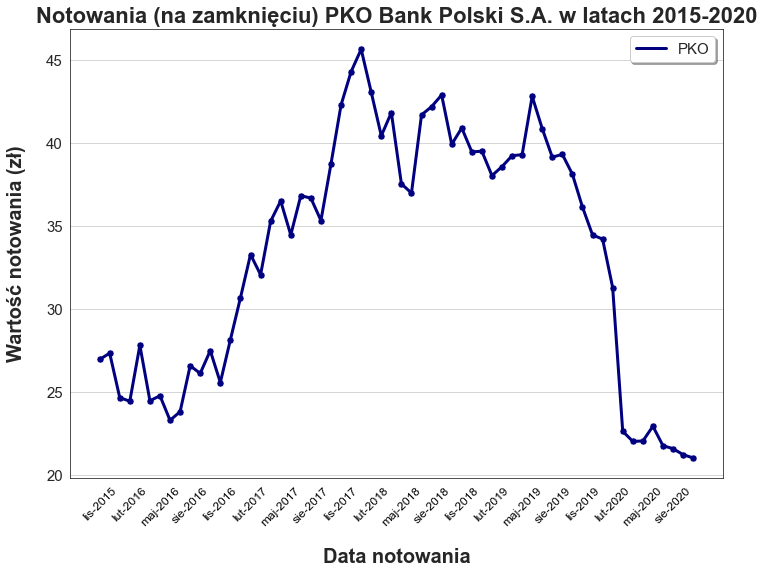

In [17]:
sns.set_style("white") #styl wykresu 

fig, ax = plt.subplots() #sposób na proste zwiększenie wykresu
fig.set_size_inches(11.7, 8.27) #rozmiary kartki A4

k = sns.lineplot(x="Data", y="Zamkniecie", data=pko, label="PKO", linewidth = 3, color="navy") #wykres liniowy
sns.scatterplot(x="Data", y="Zamkniecie", data=pko,s=50, color="navy") #zaznaczone punkty notowań

plt.legend(fancybox=True, shadow=True,framealpha=1, prop={'size':15}) #dodanie legendy

myLocator = mticker.IndexLocator( base = 3, offset = 0) #stworzenie lokalizatora, aby ustawić oś X co drugą date
ax.xaxis.set_major_locator(myLocator) #uporządkowanie osi X

k.yaxis.grid() #stworzenie horyzontalnych lin w tle wykresu

plt.xticks(rotation=45, fontsize=12, color="black") #spersonalizowanie wartości na osiach X,Y
plt.yticks(fontsize=15)

plt.title("Notowania (na zamknięciu) PKO Bank Polski S.A. w latach 2015-2020", fontsize=22,  fontweight='bold') #tytuł wykresu
plt.ylabel("Wartość notowania (zł)", fontsize=20, labelpad=20, fontweight='bold') #tytuł osi Y
plt.xlabel("Data notowania", labelpad=20, fontsize=20, fontweight='bold') #tytuł osi X

plt.savefig('pko_notowania.jpg')

plt.show() #wyświetlenie wykresu

**Próba dopasowania rozkładu dla PKO Bank Polski**

In [32]:
L_pko = pko['L_PKO']
x = np.arange(len(L_pko))
size = len(L_pko)

In [33]:
L_pko.shape
L_pko.ndim

1

In [34]:
sc = StandardScaler()
reshaped_pko = L_pko.values.reshape(-1,1) #zmiana wymiaru L_alior
sc.fit(reshaped_pko) #dopasowanie i standaryzacja danych do otrzymania średniej 0 i wariancji 1
pko_std = sc.transform(reshaped_pko) #przerzucenie dopasowania do zbioru
pko_std = pko_std.flatten() #powrot do 1 wymiarowego zbioru danych
pko_std
del reshaped_pko 

In [35]:
dist_names = ['burr',           #lista propozycji rozkładów
              'expon',
              'gamma',
              'genpareto',
              'norm',
              'lognorm',
              'pareto',
              'uniform',
              'weibull_min', 
              'weibull_max']

#utworzenie pustych list do przechowywania wyników testu
chi_square = []
p_values = []

#utworzenie 50 kolumn dla testu chi-kwadrat
#dane beda równomiernie rozłożone na wszystkich kolumnach
#percentyl = 1/100 kwantyl
percentile_bins = np.linspace(0,100,51) #zwraca równomiernie rozłożone próbki 
percentile_cutoffs = np.percentile(pko_std, percentile_bins) #zwraca kolejne percentyle
observed_frequency, bins = (np.histogram(pko_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

#petla dla dla kazdego kandydata
for distribution in dist_names:
    #ustawienie rozkładu i otrzymanie dopasowanych parametrów rozkładu
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(pko_std) #dopasowanie otrzymanych atrybutów do zbioru
    
    #otrzymanie 'p-value' dla testy Kolmogorov-Smirnoff, zaokraglenie do 5 miejsc
    p = scipy.stats.kstest(pko_std, distribution, args=param)[1]
    p = np.around(p,5)
    p_values.append(p)
    
    #otrzymanie spodziewanej liczby w kolumnach percentyli
    #oparte na dystrybuancie ('cumulative distribution function - cdf')
    cdf_fitted = dist.cdf(percentile_cutoffs, *param[:-2], loc=param[-2], scale=param[-1])
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)
    
    #obliczenie testu chi-kwadrat
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum(((cum_expected_frequency - cum_observed_frequency)**2) / cum_observed_frequency)
    chi_square.append(ss)
    
#Ulokowanie wyników i posortowanie po poprawności dopasowania (najlepsze z góry)
results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square
results['p_value'] = p_values
results.sort_values(['chi_square'], inplace=True)

#Wyświetlenie wyników
print ('\nRozkłady po poprawności dopasowania:')
print ('----------------------------------------')
print (results)
    
    



Rozkłady po poprawności dopasowania:
----------------------------------------
  Distribution  chi_square  p_value
4         norm   16.130738  0.28184
2        gamma   22.366394  0.14563
5      lognorm   22.921487  0.14085
9  weibull_max   28.830527  0.08928
7      uniform  209.562591  0.00000
0         burr  290.816803  0.00025
3    genpareto  324.383866  0.00000
1        expon  452.095651  0.00001
6       pareto  627.208739  0.00001
8  weibull_min  995.396357  0.00000


Najlepsze dopasowanie otrzymaliśmy dla rozkładu Normalnego, Gamma i Lognormal.
Wizualizujemy te rozkłady i zwrócimy parametry. 
Tym razem będziemy przeprowadzali dopasowanie do oryginalnych danych (nie zestandaryzowanych)

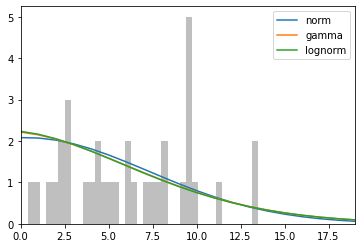


Parametry rozkładów:
------------------------

Rozkład: norm
Parametry: (0.27698740541491357, 7.037093351567346)

Rozkład: gamma
Parametry: (31.790364015403288, -38.95800332484389, 1.2341786963971404)

Rozkład: lognorm
Parametry: (0.12628406087640145, -54.573366843374274, 54.412748968758976)


In [36]:
#dzielimy obserwacje na 100 kolumn dla wizualizacji
number_of_bins = 100
bin_cutoffs = np.linspace(np.percentile(L_pko, 0), np.percentile(L_pko, 99), number_of_bins)

#tworzymy wykres
h = plt.hist(L_alior, bins=bin_cutoffs, color='0.75')

#wybierzmy 3 najlepsze rozkłady
number_distributions_to_plot = 3
dist_names = results['Distribution'].iloc[0:number_distributions_to_plot]

#tworzenie pustej listy do zwrócenia parametrów dopasowanych rozkładów
parameters = []

#petla po rozkładach aby otrzymać parametry i dopasować linie
for dist_name in dist_names:
    #wybierzemy rozkład i przechowamy parametry rozkładu
    dist = getattr(scipy.stats,dist_name)
    param = dist.fit(L_pko)
    parameters.append(param)
    
    #narysowanie linii każdego rozkładu i przeskalowanie, aby dopasować do danych
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    scale_pdf = np.trapz(h[0],h[1][:-1])/np.trapz(pdf_fitted,x)
    pdf_fitted *= scale_pdf
    
    #dodanie linii to wykresu
    plt.plot(pdf_fitted, label=dist_name)
    
    #ustawienie osi X aby zawierała 99% danych
    #to nie jest obowiązkowe, ale czasami jakiś 'outlier' powoduje wykres mniej czytelnym
    plt.xlim(0,np.percentile(L_pko,99))
    
#Dodanie legendy i wyświetlenie wykresu
plt.legend()
plt.show()

#Przechowanie parametrów rozkładu w dataframe
dist_parameters = pd.DataFrame()
dist_parameters['Distribution'] = (
        results['Distribution'].iloc[0:number_distributions_to_plot])
dist_parameters['Distribution parameters'] = parameters

#Wyświetlenie wyników parametrów
print ('\nParametry rozkładów:')
print ('------------------------')

for index, row in dist_parameters.iterrows():
    print ('\nRozkład:', row[0])
    print ('Parametry:', row[1] )